# Regression using Keras

Data available on https://www.kaggle.com/c/rossmann-store-sales/data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
df = pd.read_csv('data/rossmann-store-sales/train.csv')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [217]:
df.shape

(1017209, 9)

In [218]:
df.Store.value_counts()

1023    942
666     942
675     942
163     942
674     942
162     942
673     942
161     942
672     942
160     942
158     942
157     942
668     942
156     942
667     942
154     942
657     942
665     942
153     942
664     942
152     942
663     942
151     942
662     942
150     942
661     942
148     942
659     942
147     942
658     942
       ... 
636     758
637     758
879     758
638     758
129     758
604     758
365     758
132     758
644     758
646     758
136     758
137     758
629     758
115     758
113     758
890     758
893     758
620     758
108     758
619     758
385     758
612     758
100     758
611     758
99      758
900     758
902     758
903     758
904     758
512     758
Name: Store, Length: 1115, dtype: int64

In [219]:
df_store = pd.read_csv('data/rossmann-store-sales/store.csv')
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9.00,2008.00,0,nan,nan,NaN
1,2,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,c,c,620.00,9.00,2009.00,0,nan,nan,NaN
4,5,a,a,29910.00,4.00,2015.00,0,nan,nan,NaN


In [220]:
df = df.merge(df_store, how='inner')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.00,9.00,2008.00,0,nan,nan,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.00,9.00,2008.00,0,nan,nan,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.00,9.00,2008.00,0,nan,nan,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.00,9.00,2008.00,0,nan,nan,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.00,9.00,2008.00,0,nan,nan,NaN


In [221]:
df.shape

(1017209, 18)

In [222]:
print('Unique number of stores: ' + str(len(df.Store.value_counts())))
print('number of days: ' + str(len(df.Date.unique())))

Unique number of stores: 1115
number of days: 942


In [223]:
df.Sales.mean()

5773.818972305593

In [224]:
pd.options.display.float_format = '{:.2f}'.format ##supress scientific notation
df.Sales.describe()

count   1017209.00
mean       5773.82
std        3849.93
min           0.00
25%        3727.00
50%        5744.00
75%        7856.00
max       41551.00
Name: Sales, dtype: float64

from stats we can tell that it's an approximate normal distribution

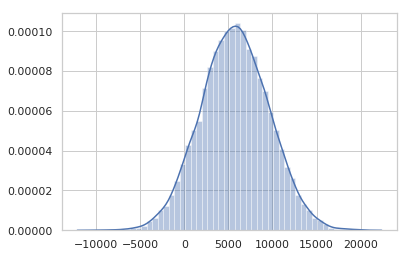

In [71]:
value = np.random.normal(loc=df.Sales.mean(),scale=df.Sales.std(),size=len(df.Sales.unique()))
sns.distplot(value)

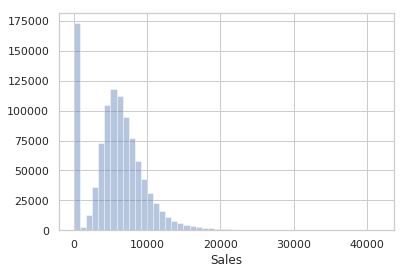

In [72]:
sns.distplot(df.Sales, kde=False);

Here we can see our normal assumption was wrong

In [225]:
df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [226]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.Date[0]

Timestamp('2015-07-31 00:00:00')

In [227]:
df["Month"] = df["Date"].dt.month

In [228]:
df.head(4)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.00,9.00,2008.00,0,nan,nan,NaN,7
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.00,9.00,2008.00,0,nan,nan,NaN,7
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.00,9.00,2008.00,0,nan,nan,NaN,7
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.00,9.00,2008.00,0,nan,nan,NaN,7


In [229]:
df["Quarter"] = df["Date"].dt.quarter
df["Year"] = df["Date"].dt.year
df["Day"] = df["Date"].dt.day
df["Week"] = df["Date"].dt.week
df["Season"] = np.where(df["Month"].isin([3,4,5]),"Spring",
                      np.where(df["Month"].isin([6,7,8]),"Summer",
                           np.where(df["Month"].isin([9,10,11]),"Fall",
                                np.where(df["Month"].isin([12,1,2]),"Winter","None"))))

In [230]:
df.head(4)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Quarter,Year,Day,Week,Season
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,nan,nan,NaN,7,3,2015,31,31,Summer
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,0,nan,nan,NaN,7,3,2015,30,31,Summer
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,0,nan,nan,NaN,7,3,2015,29,31,Summer
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,0,nan,nan,NaN,7,3,2015,28,31,Summer


# EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1afc9f8630>,
      dtype=object)

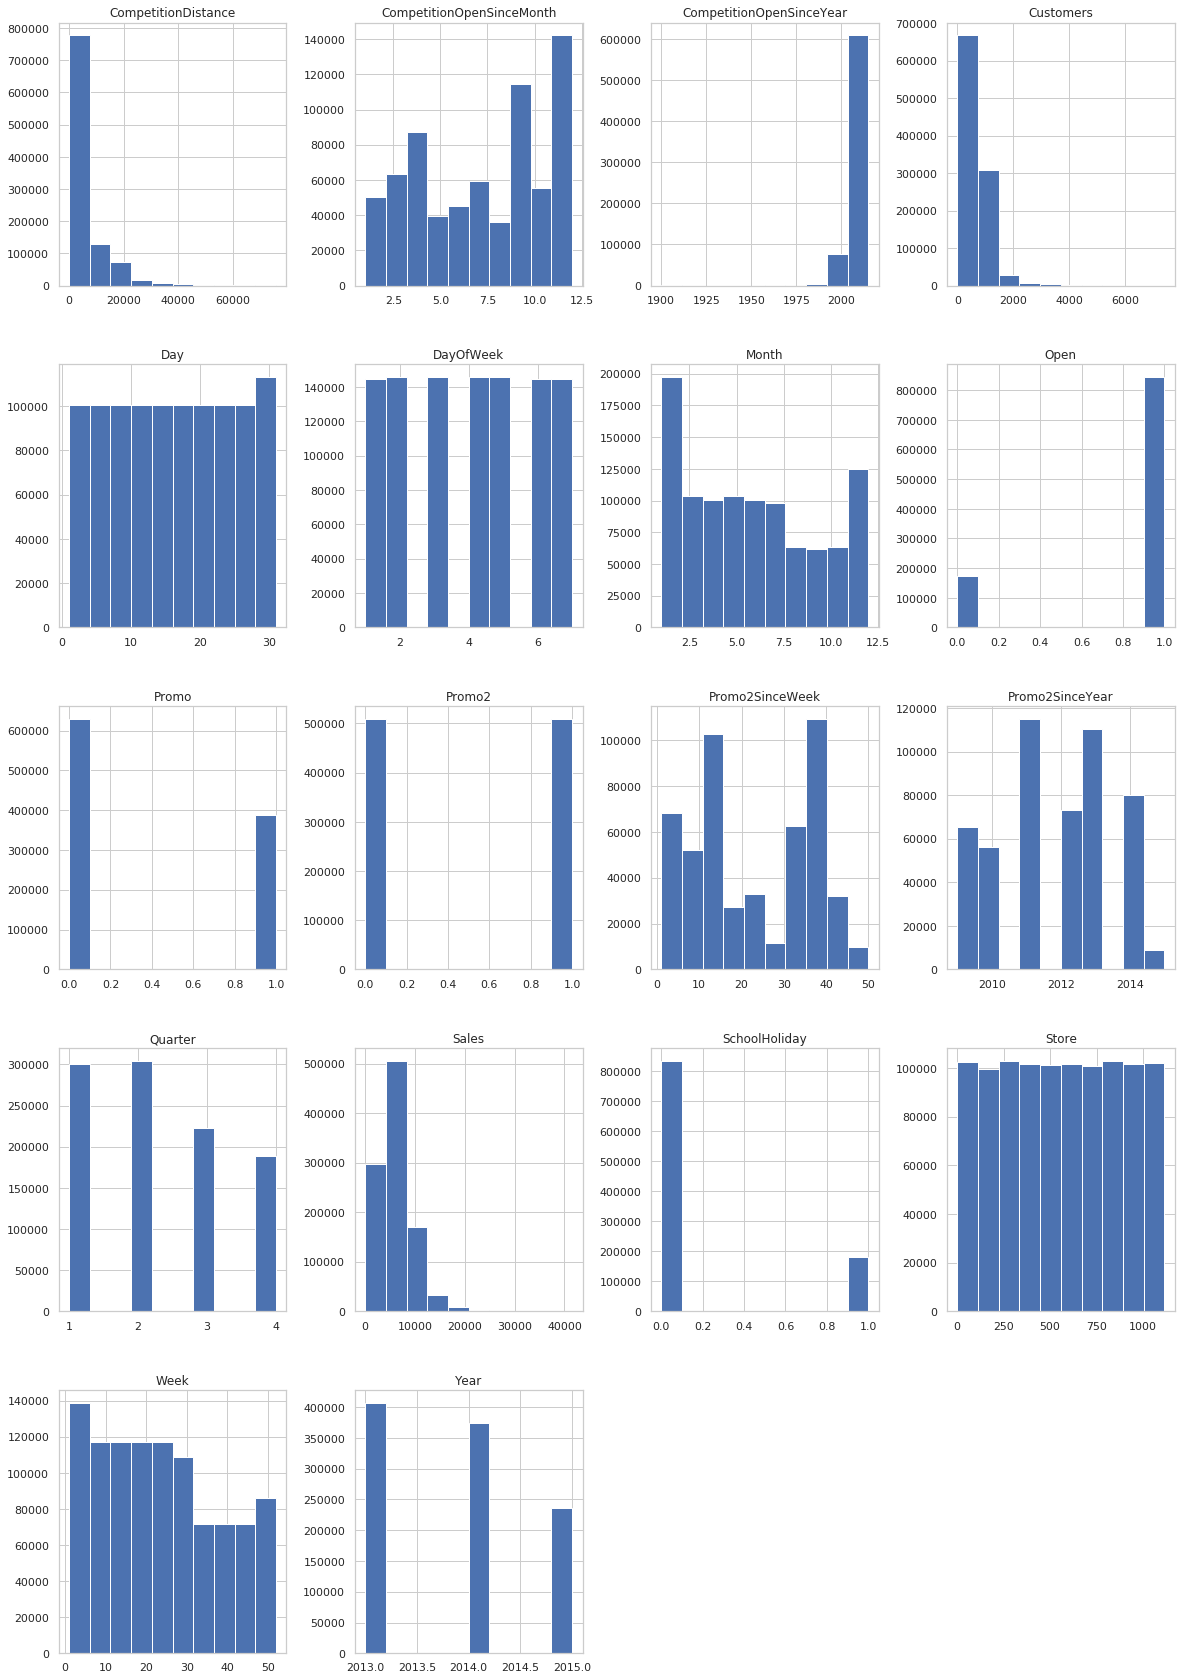

In [79]:
df.hist(figsize=(20,30))

([<matplotlib.axis.XTick at 0x7f1af8fd3748>,
 <a list of 30 Text xticklabel objects>)

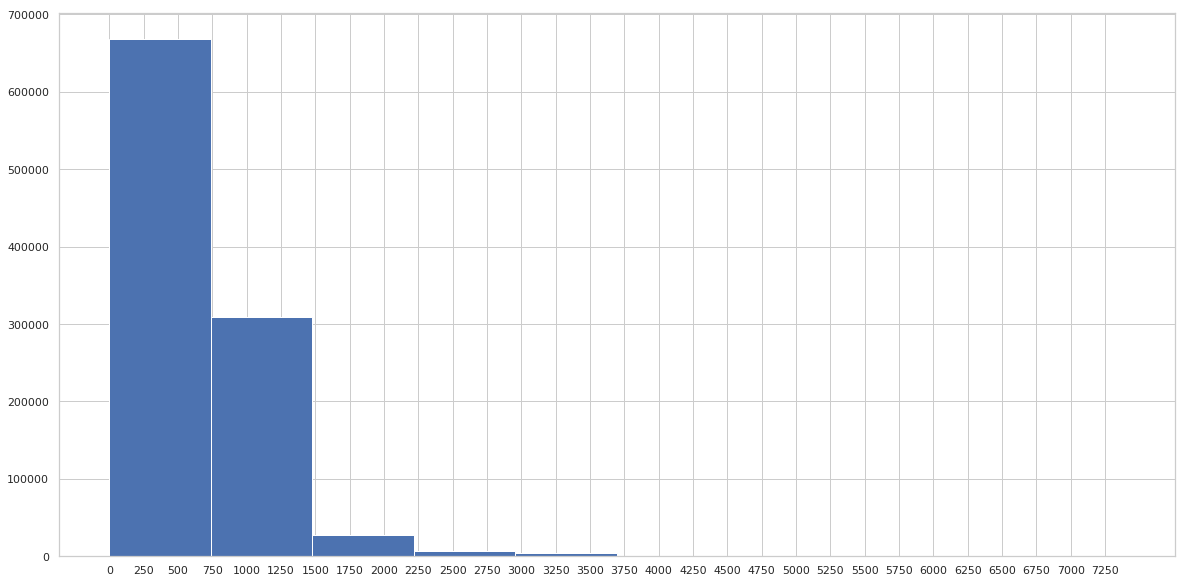

In [80]:
df.Customers.hist(figsize=(20,10))
plt.xticks(np.arange(df.Customers.min(), df.Customers.max()+1, 250.0))

In [231]:
df.isnull().sum() ## raw value

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Month                             0
Quarter                           0
Year                              0
Day                               0
Week                              0
Season                            0
dtype: int64

In [232]:
(df.isnull().sum()/df.shape[0])*100 ##percentage form

Store                        0.00
DayOfWeek                    0.00
Date                         0.00
Sales                        0.00
Customers                    0.00
Open                         0.00
Promo                        0.00
StateHoliday                 0.00
SchoolHoliday                0.00
StoreType                    0.00
Assortment                   0.00
CompetitionDistance          0.26
CompetitionOpenSinceMonth   31.79
CompetitionOpenSinceYear    31.79
Promo2                       0.00
Promo2SinceWeek             49.94
Promo2SinceYear             49.94
PromoInterval               49.94
Month                        0.00
Quarter                      0.00
Year                         0.00
Day                          0.00
Week                         0.00
Season                       0.00
dtype: float64

As a general rule of thumb features with greater than 25% missing values should be dropped 

In [233]:
df.CompetitionDistance.fillna(df.CompetitionDistance.mode()[0], inplace=True)

In [234]:
df.CompetitionDistance.isna().sum() ##cross checking :)

0

## Time for categorical variables

In [235]:
df.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Quarter,Year,Day,Week,Season
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,nan,nan,NaN,7,3,2015,31,31,Summer


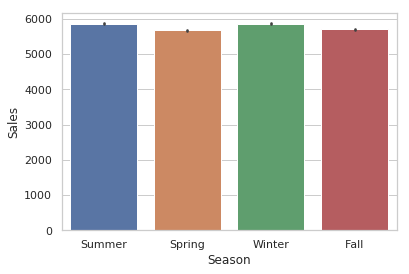

In [236]:
sns.set(style='whitegrid')
sns.barplot(x=df.Season, y=df.Sales, data=df)

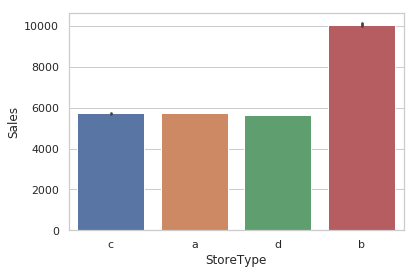

In [237]:
sns.barplot(x=df.StoreType, y=df.Sales, data=df)

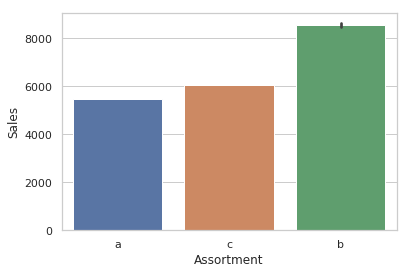

In [238]:
sns.barplot(x=df.Assortment, y=df.Sales, data=df)

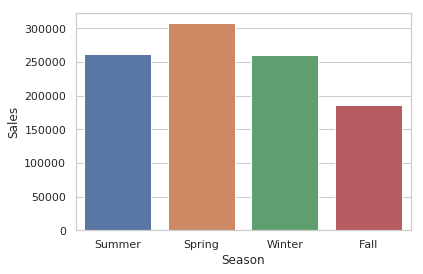

In [89]:
ax = sns.barplot(x="Season", y="Sales", data=df, estimator=np.size)

# Data Engineering 

In [239]:
df.head()
df.to_csv('data/rossmann-store-sales/df_data_eng_state.csv', index=False)
# df = pd.read_csv('data/rossmann-store-sales/df_data_eng_state.csv')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Quarter,Year,Day,Week,Season
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,nan,nan,NaN,7,3,2015,31,31,Summer
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,0,nan,nan,NaN,7,3,2015,30,31,Summer
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,0,nan,nan,NaN,7,3,2015,29,31,Summer
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,0,nan,nan,NaN,7,3,2015,28,31,Summer
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,0,nan,nan,NaN,7,3,2015,27,31,Summer


In [240]:
df_train =  pd.read_csv('data/rossmann-store-sales/train.csv')
df_test = pd.read_csv('data/rossmann-store-sales/test.csv')
train_col = df_train.columns.to_list()
test_col = df_test.columns.to_list()
drop_col = []
for col in train_col:
    if col not in test_col:
        drop_col.append(col)
print(drop_col)
drop_col.remove('Sales')
df.drop(columns=drop_col, inplace=True, axis=1)
df.drop(columns=['Date'], axis=1, inplace=True)
print(df.dtypes)

['Sales', 'Customers']
Store                          int64
DayOfWeek                      int64
Sales                          int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
Month                          int64
Quarter                        int64
Year                           int64
Day                            int64
Week                           int64
Season                        object
dtype: object


In [241]:
one_hot_encoded_df = pd.get_dummies(df)
one_hot_encoded_df.head()

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,...,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,1,5,5263,1,1,1,1270.00,9.00,2008.00,0,...,1,0,0,0,0,0,0,0,1,0
1,1,4,5020,1,1,1,1270.00,9.00,2008.00,0,...,1,0,0,0,0,0,0,0,1,0
2,1,3,4782,1,1,1,1270.00,9.00,2008.00,0,...,1,0,0,0,0,0,0,0,1,0
3,1,2,5011,1,1,1,1270.00,9.00,2008.00,0,...,1,0,0,0,0,0,0,0,1,0
4,1,1,6102,1,1,1,1270.00,9.00,2008.00,0,...,1,0,0,0,0,0,0,0,1,0


In [242]:
for col2 in one_hot_encoded_df.columns:
    if col2 not in df.columns:
        print(col2)

StateHoliday_0
StateHoliday_0
StateHoliday_a
StateHoliday_b
StateHoliday_c
StoreType_a
StoreType_b
StoreType_c
StoreType_d
Assortment_a
Assortment_b
Assortment_c
PromoInterval_Feb,May,Aug,Nov
PromoInterval_Jan,Apr,Jul,Oct
PromoInterval_Mar,Jun,Sept,Dec
Season_Fall
Season_Spring
Season_Summer
Season_Winter


In [243]:
df = one_hot_encoded_df
df.dtypes

Store                               int64
DayOfWeek                           int64
Sales                               int64
Open                                int64
Promo                               int64
SchoolHoliday                       int64
CompetitionDistance               float64
CompetitionOpenSinceMonth         float64
CompetitionOpenSinceYear          float64
Promo2                              int64
Promo2SinceWeek                   float64
Promo2SinceYear                   float64
Month                               int64
Quarter                             int64
Year                                int64
Day                                 int64
Week                                int64
StateHoliday_0                      uint8
StateHoliday_0                      uint8
StateHoliday_a                      uint8
StateHoliday_b                      uint8
StateHoliday_c                      uint8
StoreType_a                         uint8
StoreType_b                       

In [244]:
print(df.shape)

(1017209, 36)


In [245]:
df.isnull().sum() * 100/df.shape[0]

Store                             0.00
DayOfWeek                         0.00
Sales                             0.00
Open                              0.00
Promo                             0.00
SchoolHoliday                     0.00
CompetitionDistance               0.00
CompetitionOpenSinceMonth        31.79
CompetitionOpenSinceYear         31.79
Promo2                            0.00
Promo2SinceWeek                  49.94
Promo2SinceYear                  49.94
Month                             0.00
Quarter                           0.00
Year                              0.00
Day                               0.00
Week                              0.00
StateHoliday_0                    0.00
StateHoliday_0                    0.00
StateHoliday_a                    0.00
StateHoliday_b                    0.00
StateHoliday_c                    0.00
StoreType_a                       0.00
StoreType_b                       0.00
StoreType_c                       0.00
StoreType_d              

### Now there are two tasks that need to be done
1) Handle Missing Values

2) Correct StateHoliday columns as they seem to have wrong categories

In [246]:
drop_cols = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']
df.drop(columns=drop_cols, inplace=True)
df.head()

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Month,Quarter,...,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,1,5,5263,1,1,1,1270.00,0,7,3,...,1,0,0,0,0,0,0,0,1,0
1,1,4,5020,1,1,1,1270.00,0,7,3,...,1,0,0,0,0,0,0,0,1,0
2,1,3,4782,1,1,1,1270.00,0,7,3,...,1,0,0,0,0,0,0,0,1,0
3,1,2,5011,1,1,1,1270.00,0,7,3,...,1,0,0,0,0,0,0,0,1,0
4,1,1,6102,1,1,1,1270.00,0,7,3,...,1,0,0,0,0,0,0,0,1,0


In [247]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'Promo2', 'Month', 'Quarter', 'Year', 'Day',
       'Week', 'StateHoliday_0', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec',
       'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')

In [248]:
df['StateHoliday'] = df.StateHoliday_a + df.StateHoliday_b + df.StateHoliday_c
df['StateHoliday']

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
1017179    0
1017180    0
1017181    0
1017182    0
1017183    0
1017184    0
1017185    0
1017186    0
1017187    0
1017188    0
1017189    0
1017190    0
1017191    0
1017192    0
1017193    0
1017194    0
1017195    0
1017196    0
1017197    0
1017198    0
1017199    0
1017200    0
1017201    0
1017202    0
1017203    0
1017204    0
1017205    0
1017206    0
1017207    0
1017208    1
Name: StateHoliday, Length: 1017209, dtype: uint8

In [249]:
df.StateHoliday.value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

In [250]:
df.drop(columns=['StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'], inplace=True)
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'Promo2', 'Month', 'Quarter', 'Year', 'Day',
       'Week', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'StateHoliday'],
      dtype='object')

In [251]:
df.head()

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Month,Quarter,...,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Season_Fall,Season_Spring,Season_Summer,Season_Winter,StateHoliday
0,1,5,5263,1,1,1,1270.00,0,7,3,...,0,0,0,0,0,0,0,1,0,0
1,1,4,5020,1,1,1,1270.00,0,7,3,...,0,0,0,0,0,0,0,1,0,0
2,1,3,4782,1,1,1,1270.00,0,7,3,...,0,0,0,0,0,0,0,1,0,0
3,1,2,5011,1,1,1,1270.00,0,7,3,...,0,0,0,0,0,0,0,1,0,0
4,1,1,6102,1,1,1,1270.00,0,7,3,...,0,0,0,0,0,0,0,1,0,0


In [252]:
df.values

array([[1.000e+00, 5.000e+00, 5.263e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 4.000e+00, 5.020e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 3.000e+00, 4.782e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.115e+03, 4.000e+00, 4.297e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.115e+03, 3.000e+00, 3.697e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.115e+03, 2.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00]])

In [253]:
df.dtypes

Store                               int64
DayOfWeek                           int64
Sales                               int64
Open                                int64
Promo                               int64
SchoolHoliday                       int64
CompetitionDistance               float64
Promo2                              int64
Month                               int64
Quarter                             int64
Year                                int64
Day                                 int64
Week                                int64
StoreType_a                         uint8
StoreType_b                         uint8
StoreType_c                         uint8
StoreType_d                         uint8
Assortment_a                        uint8
Assortment_b                        uint8
Assortment_c                        uint8
PromoInterval_Feb,May,Aug,Nov       uint8
PromoInterval_Jan,Apr,Jul,Oct       uint8
PromoInterval_Mar,Jun,Sept,Dec      uint8
Season_Fall                       

In [254]:
categorical_columns=['Month', 'Year', 'Quarter', 'DayOfWeek']
df = pd.get_dummies(df, columns=categorical_columns)
df.head()

,Store,Sales,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Day,Week,StoreType_a,...,Quarter_2,Quarter_3,Quarter_4,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,1,5263,1,1,1,1270.00,0,31,31,0,...,0,1,0,0,0,0,0,1,0,0
1,1,5020,1,1,1,1270.00,0,30,31,0,...,0,1,0,0,0,0,1,0,0,0
2,1,4782,1,1,1,1270.00,0,29,31,0,...,0,1,0,0,0,1,0,0,0,0
3,1,5011,1,1,1,1270.00,0,28,31,0,...,0,1,0,0,1,0,0,0,0,0
4,1,6102,1,1,1,1270.00,0,27,31,0,...,0,1,0,1,0,0,0,0,0,0


In [255]:
df.shape

(1017209, 50)

In [256]:
df.dtypes

Store                               int64
Sales                               int64
Open                                int64
Promo                               int64
SchoolHoliday                       int64
CompetitionDistance               float64
Promo2                              int64
Day                                 int64
Week                                int64
StoreType_a                         uint8
StoreType_b                         uint8
StoreType_c                         uint8
StoreType_d                         uint8
Assortment_a                        uint8
Assortment_b                        uint8
Assortment_c                        uint8
PromoInterval_Feb,May,Aug,Nov       uint8
PromoInterval_Jan,Apr,Jul,Oct       uint8
PromoInterval_Mar,Jun,Sept,Dec      uint8
Season_Fall                         uint8
Season_Spring                       uint8
Season_Summer                       uint8
Season_Winter                       uint8
StateHoliday                      

In [257]:
df.to_csv('data/rossmann-store-sales/train_df_new.csv', index=False)

In [258]:
# df.drop(columns=['Date'], inplace=True)
df.shape

(1017209, 50)

In [259]:
df.head()

,Store,Sales,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Day,Week,StoreType_a,...,Quarter_2,Quarter_3,Quarter_4,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,1,5263,1,1,1,1270.00,0,31,31,0,...,0,1,0,0,0,0,0,1,0,0
1,1,5020,1,1,1,1270.00,0,30,31,0,...,0,1,0,0,0,0,1,0,0,0
2,1,4782,1,1,1,1270.00,0,29,31,0,...,0,1,0,0,0,1,0,0,0,0
3,1,5011,1,1,1,1270.00,0,28,31,0,...,0,1,0,0,1,0,0,0,0,0
4,1,6102,1,1,1,1270.00,0,27,31,0,...,0,1,0,1,0,0,0,0,0,0


In [260]:
df.dtypes

Store                               int64
Sales                               int64
Open                                int64
Promo                               int64
SchoolHoliday                       int64
CompetitionDistance               float64
Promo2                              int64
Day                                 int64
Week                                int64
StoreType_a                         uint8
StoreType_b                         uint8
StoreType_c                         uint8
StoreType_d                         uint8
Assortment_a                        uint8
Assortment_b                        uint8
Assortment_c                        uint8
PromoInterval_Feb,May,Aug,Nov       uint8
PromoInterval_Jan,Apr,Jul,Oct       uint8
PromoInterval_Mar,Jun,Sept,Dec      uint8
Season_Fall                         uint8
Season_Spring                       uint8
Season_Summer                       uint8
Season_Winter                       uint8
StateHoliday                      

In [261]:
X = df.drop(columns=['Sales']).values
Y = df.Sales.values
type(X)

numpy.ndarray

In [262]:
print(X.shape)
print(Y.shape)

(1017209, 49)
(1017209,)


In [263]:
Y = Y.reshape(-1,1)
Y.shape

(1017209, 1)

In [264]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2020)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(813767, 49)
(813767, 1)
(203442, 49)
(203442, 1)


In [265]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=2020)
print(X_val.shape)
print(Y_val.shape)
print(X_train.shape)
print(Y_train.shape)

(162754, 49)
(162754, 1)
(651013, 49)
(651013, 1)


## Setting Model Baseline Performance

In [96]:
mean_sales = Y_train.mean()
mean_sales

5768.737200332405

In [97]:
print("MAE for mean sales: ", abs(mean_sales-Y_test).mean())

MAE for mean sales:  2897.2388438113235


## Creating DNN model

In [102]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [266]:
model = Sequential()
model.add(Dense(150, input_dim=49, activation='relu'))
model.add(Dense(1, activation='linear'))

In [267]:
model.compile(optimizer='Adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

In [268]:
model.fit(x=X_train, y=Y_train, batch_size=64, validation_data=(X_val, Y_val), epochs=10)

Train on 651013 samples, validate on 162754 samples
Epoch 1/10
651013/651013 [==============================] - 25s 38us/step - loss: 2859.4578 - mean_absolute_error: 2859.4575 - val_loss: 2172.8478 - val_mean_absolute_error: 2172.8503
Epoch 2/10
651013/651013 [==============================] - 25s 38us/step - loss: 1869.8534 - mean_absolute_error: 1869.8573 - val_loss: 1740.2392 - val_mean_absolute_error: 1740.2388
Epoch 3/10
651013/651013 [==============================] - 27s 41us/step - loss: 1724.4811 - mean_absolute_error: 1724.4797 - val_loss: 1669.7828 - val_mean_absolute_error: 1669.7822
Epoch 4/10
651013/651013 [==============================] - 26s 39us/step - loss: 1693.5665 - mean_absolute_error: 1693.5677 - val_loss: 1703.2701 - val_mean_absolute_error: 1703.2720
Epoch 5/10
651013/651013 [==============================] - 25s 38us/step - loss: 1679.9855 - mean_absolute_error: 1679.9824 - val_loss: 1640.4949 - val_mean_absolute_error: 1640.4962
Epoch 6/10
651013/651013 [==

## Testing Model Performance

In [126]:
print(model.metrics_names)
print(model.evaluate(X_test, Y_test))

['loss', 'mean_absolute_error']
203442/203442 [==============================] - 4s 22us/step
[674.8895816121012, 674.8885498046875]


we got a relatively consistent performance on the test dataset too, which is way better than our baseline score.

## Improving the Model

In [115]:
model = Sequential()
model.add(Dense(150, input_dim=41, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [116]:
history = model.fit(x=X_train, y=Y_train, batch_size=64, validation_data=(X_val, Y_val), epochs=10)
print(model.metrics_names)
print(model.evaluate(X_test, Y_test))

Train on 651013 samples, validate on 162754 samples
Epoch 1/10
651013/651013 [==============================] - 59s 90us/step - loss: 10421835.1861 - mean_absolute_error: 2368.9673 - val_loss: 9078652.2091 - val_mean_absolute_error: 2058.8391
Epoch 2/10
651013/651013 [==============================] - 59s 91us/step - loss: 7529201.4041 - mean_absolute_error: 1926.5355 - val_loss: 7277649.0927 - val_mean_absolute_error: 1961.3694
Epoch 3/10
651013/651013 [==============================] - 59s 91us/step - loss: 7031285.1245 - mean_absolute_error: 1854.7750 - val_loss: 9178328.8380 - val_mean_absolute_error: 2270.7480
Epoch 4/10
651013/651013 [==============================] - 63s 97us/step - loss: 6607087.4172 - mean_absolute_error: 1795.5214 - val_loss: 6094816.2182 - val_mean_absolute_error: 1694.6599
Epoch 5/10
651013/651013 [==============================] - 62s 95us/step - loss: 6289941.7882 - mean_absolute_error: 1750.8005 - val_loss: 6116337.5757 - val_mean_absolute_error: 1778.11

KeyboardInterrupt: 

In [130]:
model = Sequential()
model.add(Dense(150, input_dim=50, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [131]:
history = model.fit(x=X_train, y=Y_train, batch_size=64, validation_data=(X_val, Y_val), epochs=15)

Train on 651013 samples, validate on 162754 samples
Epoch 1/15
651013/651013 [==============================] - 75s 115us/step - loss: 1674377.2617 - mean_absolute_error: 843.3590 - val_loss: 1524033.8426 - val_mean_absolute_error: 866.9197
Epoch 2/15
651013/651013 [==============================] - 78s 120us/step - loss: 1130651.8387 - mean_absolute_error: 715.0510 - val_loss: 1015546.3133 - val_mean_absolute_error: 682.4732
Epoch 3/15
651013/651013 [==============================] - 68s 105us/step - loss: 1042501.9656 - mean_absolute_error: 687.1031 - val_loss: 947073.6573 - val_mean_absolute_error: 647.8725
Epoch 4/15
651013/651013 [==============================] - 65s 100us/step - loss: 986158.0027 - mean_absolute_error: 668.0057 - val_loss: 1158290.5761 - val_mean_absolute_error: 729.2668
Epoch 5/15
651013/651013 [==============================] - 65s 100us/step - loss: 930098.7794 - mean_absolute_error: 649.8564 - val_loss: 897749.8703 - val_mean_absolute_error: 634.5795
Epoch 6

In [132]:
print('*'*100,'\n',model.metrics_names)
print(model.evaluate(X_test, Y_test))

**************************************************************************************************** 
 ['loss', 'mean_absolute_error']
203442/203442 [==============================] - 10s 48us/step
[585800.6117751005, 502.0413513183594]


increasing no of neurons

In [100]:
from keras.callbacks import History
history = History()

In [101]:
model = Sequential()
model.add(Dense(350, input_dim=50, activation='relu'))
model.add(Dense(350, activation='relu'))
model.add(Dense(350, activation='relu'))
model.add(Dense(350, activation='relu'))
model.add(Dense(350, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.fit(x=X_train, y=Y_train, batch_size=64, validation_data=(X_val, Y_val), epochs=13, callbacks=[history])
print('*'*100,'\n',model.metrics_names)
print(model.evaluate(X_test, Y_test))

Train on 651013 samples, validate on 162754 samples
Epoch 1/13
651013/651013 [==============================] - 236s 363us/step - loss: 1597090.1167 - mean_absolute_error: 832.8279 - val_loss: 1150969.0789 - val_mean_absolute_error: 727.0773
Epoch 2/13
651013/651013 [==============================] - 241s 370us/step - loss: 1143724.4486 - mean_absolute_error: 718.0552 - val_loss: 1033448.4338 - val_mean_absolute_error: 676.1231
Epoch 3/13
651013/651013 [==============================] - 327s 502us/step - loss: 1058706.2678 - mean_absolute_error: 691.5197 - val_loss: 1014739.7245 - val_mean_absolute_error: 689.9392
Epoch 4/13
651013/651013 [==============================] - 886s 1ms/step - loss: 1000507.1018 - mean_absolute_error: 672.4795 - val_loss: 1096979.8920 - val_mean_absolute_error: 687.7973
Epoch 5/13
651013/651013 [==============================] - 1366s 2ms/step - loss: 945766.1327 - mean_absolute_error: 654.7213 - val_loss: 846631.6656 - val_mean_absolute_error: 622.3771
Epo

## Plotting the learning Curve

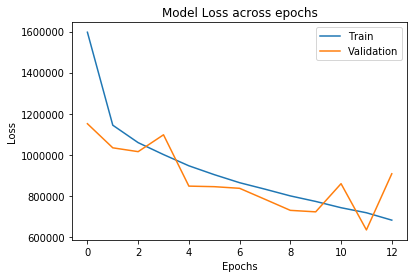

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss across epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Saving the model locally

In [269]:
import pickle
model_name = 'DNN_Model.sav'
pickle.dump(model, open(model_name, 'wb'))

In [270]:
# import joblib
# model_name = 'DNN_Model.sav'
# joblib.dump(model, file)

## Loading the model from local disk

In [3]:
model_name = 'DNN_Model.sav'
# model = joblib.load(model_name)
model = pickle.load(open(model_name, 'rb'))


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


## Predicting

In [4]:
df = pd.read_csv('data/rossmann-store-sales/test.csv')
df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
df.Store.max()

1115

In [6]:
df.Date.unique()

array(['2015-09-17', '2015-09-16', '2015-09-15', '2015-09-14',
       '2015-09-13', '2015-09-12', '2015-09-11', '2015-09-10',
       '2015-09-09', '2015-09-08', '2015-09-07', '2015-09-06',
       '2015-09-05', '2015-09-04', '2015-09-03', '2015-09-02',
       '2015-09-01', '2015-08-31', '2015-08-30', '2015-08-29',
       '2015-08-28', '2015-08-27', '2015-08-26', '2015-08-25',
       '2015-08-24', '2015-08-23', '2015-08-22', '2015-08-21',
       '2015-08-20', '2015-08-19', '2015-08-18', '2015-08-17',
       '2015-08-16', '2015-08-15', '2015-08-14', '2015-08-13',
       '2015-08-12', '2015-08-11', '2015-08-10', '2015-08-09',
       '2015-08-08', '2015-08-07', '2015-08-06', '2015-08-05',
       '2015-08-04', '2015-08-03', '2015-08-02', '2015-08-01'],
      dtype=object)

In [7]:
df2 = pd.read_csv('data/rossmann-store-sales/store.csv')
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
df = df.merge(df2, how='inner', on=['Store'])
df.sort_values('Id',inplace=True, ascending=True)
df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Month,Quarter,...,Season,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,9,3,...,Fall,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
48,2,3,4,2015-09-17,1.0,1,0,0,9,3,...,Fall,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
96,3,7,4,2015-09-17,1.0,1,0,0,9,3,...,Fall,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
144,4,8,4,2015-09-17,1.0,1,0,0,9,3,...,Fall,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
192,5,9,4,2015-09-17,1.0,1,0,0,9,3,...,Fall,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [11]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df['Month'] = df['Date'].dt.month
df["Quarter"] = df["Date"].dt.quarter
df["Year"] = df["Date"].dt.year
df["Day"] = df["Date"].dt.day
df["Week"] = df["Date"].dt.week
df["Season"] = np.where(df["Month"].isin([3,4,5]),"Spring",
                      np.where(df["Month"].isin([6,7,8]),"Summer",
                           np.where(df["Month"].isin([9,10,11]),"Fall",
                                np.where(df["Month"].isin([12,1,2]),"Winter","None"))))

In [12]:
df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Month,Quarter,...,Season,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,9,3,...,Fall,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
48,2,3,4,2015-09-17,1.0,1,0,0,9,3,...,Fall,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
96,3,7,4,2015-09-17,1.0,1,0,0,9,3,...,Fall,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
144,4,8,4,2015-09-17,1.0,1,0,0,9,3,...,Fall,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
192,5,9,4,2015-09-17,1.0,1,0,0,9,3,...,Fall,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [13]:
df.isna().sum()*100/df.shape[0]

Id                            0.000000
Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Open                          0.026772
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.233645
CompetitionOpenSinceMonth    37.032710
CompetitionOpenSinceYear     37.032710
Promo2                        0.000000
Promo2SinceWeek              41.939252
Promo2SinceYear              41.939252
PromoInterval                41.939252
dtype: float64

In [14]:
df.CompetitionDistance.mode()

0    190.0
1    250.0
dtype: float64

In [15]:
df.CompetitionDistance.fillna(df.CompetitionDistance.mode()[0], inplace=True)
df.isna().sum()*100/df.shape[0]

Id                            0.000000
Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Open                          0.026772
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.000000
CompetitionOpenSinceMonth    37.032710
CompetitionOpenSinceYear     37.032710
Promo2                        0.000000
Promo2SinceWeek              41.939252
Promo2SinceYear              41.939252
PromoInterval                41.939252
dtype: float64

In [16]:
drop_cols = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']
df.drop(columns=drop_cols, inplace=True)

In [17]:
df.isna().sum()*100/df.shape[0]

Id                      0.000000
Store                   0.000000
DayOfWeek               0.000000
Date                    0.000000
Open                    0.026772
Promo                   0.000000
StateHoliday            0.000000
SchoolHoliday           0.000000
Month                   0.000000
Quarter                 0.000000
Year                    0.000000
Day                     0.000000
Week                    0.000000
Season                  0.000000
StoreType               0.000000
Assortment              0.000000
CompetitionDistance     0.000000
Promo2                  0.000000
PromoInterval          41.939252
dtype: float64

In [18]:
df.Open.fillna(df.Open.mode()[0], inplace=True)
df.isna().sum()*100/df.shape[0]

Id                      0.000000
Store                   0.000000
DayOfWeek               0.000000
Date                    0.000000
Open                    0.000000
Promo                   0.000000
StateHoliday            0.000000
SchoolHoliday           0.000000
Month                   0.000000
Quarter                 0.000000
Year                    0.000000
Day                     0.000000
Week                    0.000000
Season                  0.000000
StoreType               0.000000
Assortment              0.000000
CompetitionDistance     0.000000
Promo2                  0.000000
PromoInterval          41.939252
dtype: float64

In [19]:
df.dtypes

Id                              int64
Store                           int64
DayOfWeek                       int64
Date                   datetime64[ns]
Open                          float64
Promo                           int64
StateHoliday                   object
SchoolHoliday                   int64
Month                           int64
Quarter                         int64
Year                            int64
Day                             int64
Week                            int64
Season                         object
StoreType                      object
Assortment                     object
CompetitionDistance           float64
Promo2                          int64
PromoInterval                  object
dtype: object

In [20]:
df.StateHoliday.unique()

array(['0', 'a'], dtype=object)

In [21]:
df['StateHoliday'] = df.StateHoliday.apply(lambda x: 1 if x=='a' else 0)
df.StateHoliday.unique()

array([0, 1])

In [22]:
df.dtypes

Id                              int64
Store                           int64
DayOfWeek                       int64
Date                   datetime64[ns]
Open                          float64
Promo                           int64
StateHoliday                    int64
SchoolHoliday                   int64
Month                           int64
Quarter                         int64
Year                            int64
Day                             int64
Week                            int64
Season                         object
StoreType                      object
Assortment                     object
CompetitionDistance           float64
Promo2                          int64
PromoInterval                  object
dtype: object

In [23]:
df = pd.get_dummies(df)
df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Month,Quarter,...,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,1,4,2015-09-17,1.0,1,0,0,9,3,...,0,0,1,0,1,0,0,0,0,0
48,2,3,4,2015-09-17,1.0,1,0,0,9,3,...,1,0,0,0,1,0,0,0,1,0
96,3,7,4,2015-09-17,1.0,1,0,0,9,3,...,1,0,0,0,0,0,1,0,0,0
144,4,8,4,2015-09-17,1.0,1,0,0,9,3,...,1,0,0,0,1,0,0,0,0,0
192,5,9,4,2015-09-17,1.0,1,0,0,9,3,...,1,0,0,0,0,0,1,0,0,0


In [24]:
df.dtypes

Id                                         int64
Store                                      int64
DayOfWeek                                  int64
Date                              datetime64[ns]
Open                                     float64
Promo                                      int64
StateHoliday                               int64
SchoolHoliday                              int64
Month                                      int64
Quarter                                    int64
Year                                       int64
Day                                        int64
Week                                       int64
CompetitionDistance                      float64
Promo2                                     int64
Season_Fall                                uint8
Season_Summer                              uint8
StoreType_a                                uint8
StoreType_b                                uint8
StoreType_c                                uint8
StoreType_d         

In [25]:
categorical_columns=['Month', 'Year', 'Quarter', 'DayOfWeek']
df = pd.get_dummies(df, columns=categorical_columns)
df.dtypes

Id                                         int64
Store                                      int64
Date                              datetime64[ns]
Open                                     float64
Promo                                      int64
StateHoliday                               int64
SchoolHoliday                              int64
Day                                        int64
Week                                       int64
CompetitionDistance                      float64
Promo2                                     int64
Season_Fall                                uint8
Season_Summer                              uint8
StoreType_a                                uint8
StoreType_b                                uint8
StoreType_c                                uint8
StoreType_d                                uint8
Assortment_a                               uint8
Assortment_b                               uint8
Assortment_c                               uint8
PromoInterval_Feb,Ma

In [26]:
df['Season_Spring'] = 0
df['Season_Winter'] = 0
df.drop(columns=['Date'], inplace=True)
df.shape

(41088, 35)

In [27]:
df.dtypes

Id                                  int64
Store                               int64
Open                              float64
Promo                               int64
StateHoliday                        int64
SchoolHoliday                       int64
Day                                 int64
Week                                int64
CompetitionDistance               float64
Promo2                              int64
Season_Fall                         uint8
Season_Summer                       uint8
StoreType_a                         uint8
StoreType_b                         uint8
StoreType_c                         uint8
StoreType_d                         uint8
Assortment_a                        uint8
Assortment_b                        uint8
Assortment_c                        uint8
PromoInterval_Feb,May,Aug,Nov       uint8
PromoInterval_Jan,Apr,Jul,Oct       uint8
PromoInterval_Mar,Jun,Sept,Dec      uint8
Month_8                             uint8
Month_9                           

In [28]:
df['Quarter_2'] = 0
len(df.columns)

36

In [29]:
new_cols = ['Quarter_1',
            'Quarter_4'
            'Month_1',
            'Month_2', 
           'Month_3',
           'Month_4',
           'Month_5',
           'Month_6',
           'Month_7',
           'Month_10',
           'Month_11',
           'Month_12',
           'Year_2013',
           'Year_2014']
for col in new_cols:
    df[col] = 0
len(df.columns)

49

In [33]:
X_test = df.values
print(X_test.shape) 

(41088, 49)


Yes!!

In [35]:
X_test

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 3.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.0000e+00, 7.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [4.1086e+04, 1.1130e+03, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.1087e+04, 1.1140e+03, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.1088e+04, 1.1150e+03, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [36]:
df.head()

,Id,Store,Open,Promo,StateHoliday,SchoolHoliday,Day,Week,CompetitionDistance,Promo2,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_10,Month_11,Month_12,Year_2013,Year_2014
0,1,1,1.0,1,0,0,17,38,1270.0,0,...,0,0,0,0,0,0,0,0,0,0
48,2,3,1.0,1,0,0,17,38,14130.0,1,...,0,0,0,0,0,0,0,0,0,0
96,3,7,1.0,1,0,0,17,38,24000.0,0,...,0,0,0,0,0,0,0,0,0,0
144,4,8,1.0,1,0,0,17,38,7520.0,0,...,0,0,0,0,0,0,0,0,0,0
192,5,9,1.0,1,0,0,17,38,2030.0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_train = pd.read_csv('data/rossmann-store-sales/train_df.csv')
df = df.reindex(df_train.columns, axis=1)
len(df.columns)

52

In [38]:
df.head()

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Day,...,Quarter_2,Quarter_3,Quarter_4,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,1,NaN,NaN,NaN,1.0,1,0,1270.0,0,17,...,0,1,NaN,0,0,0,1,0,0,0
48,3,NaN,NaN,NaN,1.0,1,0,14130.0,1,17,...,0,1,NaN,0,0,0,1,0,0,0
96,7,NaN,NaN,NaN,1.0,1,0,24000.0,0,17,...,0,1,NaN,0,0,0,1,0,0,0
144,8,NaN,NaN,NaN,1.0,1,0,7520.0,0,17,...,0,1,NaN,0,0,0,1,0,0,0
192,9,NaN,NaN,NaN,1.0,1,0,2030.0,0,17,...,0,1,NaN,0,0,0,1,0,0,0


In [39]:
df.isnull().sum()

Store                                 0
Date                              41088
Sales                             41088
Customers                         41088
Open                                  0
Promo                                 0
SchoolHoliday                         0
CompetitionDistance                   0
Promo2                                0
Day                                   0
Week                                  0
StoreType_a                           0
StoreType_b                           0
StoreType_c                           0
StoreType_d                           0
Assortment_a                          0
Assortment_b                          0
Assortment_c                          0
PromoInterval_Feb,May,Aug,Nov         0
PromoInterval_Jan,Apr,Jul,Oct         0
PromoInterval_Mar,Jun,Sept,Dec        0
Season_Fall                           0
Season_Spring                         0
Season_Summer                         0
Season_Winter                         0


In [40]:
df.drop(columns=['Sales', 'Date', 'Customers'], inplace=True, axis=1)
df.shape

(41088, 49)

In [41]:
col_zero = ['Customers', 'Month_1', 'Quarter_4']
for col in col_zero:
    df[col] = 0
df.isnull().sum()

Store                             0
Open                              0
Promo                             0
SchoolHoliday                     0
CompetitionDistance               0
Promo2                            0
Day                               0
Week                              0
StoreType_a                       0
StoreType_b                       0
StoreType_c                       0
StoreType_d                       0
Assortment_a                      0
Assortment_b                      0
Assortment_c                      0
PromoInterval_Feb,May,Aug,Nov     0
PromoInterval_Jan,Apr,Jul,Oct     0
PromoInterval_Mar,Jun,Sept,Dec    0
Season_Fall                       0
Season_Spring                     0
Season_Summer                     0
Season_Winter                     0
StateHoliday                      0
Month_1                           0
Month_2                           0
Month_3                           0
Month_4                           0
Month_5                     

In [44]:
df.drop(columns='Customers', inplace=True, axis=1)
df.shape

(41088, 49)

In [45]:
X_test=df.values
X_test.shape

(41088, 49)

In [46]:
Y_test = model.predict(X_test)

In [47]:
Y_test

array([[6864.646 ],
       [5937.738 ],
       [6448.87  ],
       ...,
       [5265.1997],
       [5635.3354],
       [4938.6465]], dtype=float32)

In [48]:
np.set_printoptions(suppress=True)
Y_test

array([[6864.646 ],
       [5937.738 ],
       [6448.87  ],
       ...,
       [5265.1997],
       [5635.3354],
       [4938.6465]], dtype=float32)

In [49]:
Y_test.mean()

5260.64

In [50]:
Y_test.shape

(41088, 1)

In [312]:
df_sample = pd.read_csv('data/rossmann-store-sales/sample_submission.csv')
df_sample.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [52]:
df_predict = pd.DataFrame(Y_test, columns=['Sales'])
df_predict.head()

,Sales
0,6864.645996
1,5937.737793
2,6448.870117
3,6565.611816
4,7523.144531


In [56]:
df_predict['Id'] = [i for i in range(1, len(df_predict)+1)]
df_predict.head()

,Sales,Id
0,6864.645996,1
1,5937.737793,2
2,6448.870117,3
3,6565.611816,4
4,7523.144531,5


In [58]:
df_predict = df_predict.reindex(columns=['Id', 'Sales'])
df_predict.head()

,Id,Sales
0,1,6864.645996
1,2,5937.737793
2,3,6448.870117
3,4,6565.611816
4,5,7523.144531


In [59]:
df_predict.to_csv('data/rossmann-store-sales/prediction.csv', index=False)

In [60]:
df_predict.shape

(41088, 2)